# PCA


In [4]:
# Task 1: Exploratory Data Analysis (EDA):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\anwes\\OneDrive\\Desktop\\assignment\\PCA\\PCA\\wine.csv")
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [5]:
# BASIC DATA EXPLORATION-

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDataset Shape:")
print(df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Summary Statistics:
             Type     Alcohol       Malic         Ash  Alcalinity 

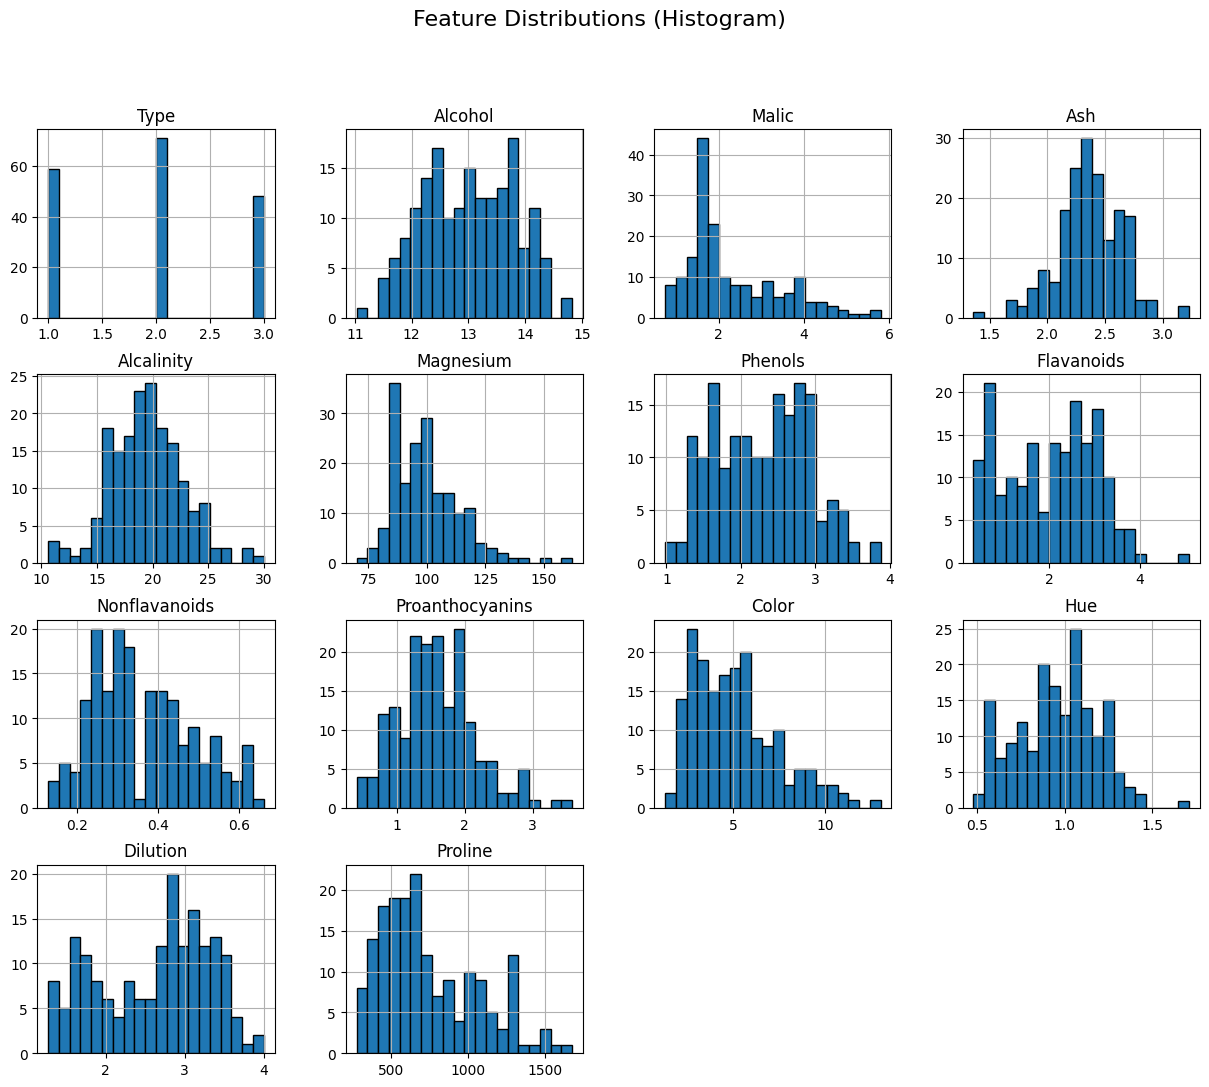

In [7]:
#DISTRIBUTION OF EACH FEATURE (HISTOGRAM)
df.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle("Feature Distributions (Histogram)", fontsize=16)
plt.show()





In [11]:
# Task 2: Dimensionality Reduction with PCA:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate input features & target
X = df.drop("Type", axis=1)       # all numerical features
y = df["Type"]

# STANDARDIZE THE FEATURES

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized Data Shape:", X_scaled.shape)

Standardized Data Shape: (178, 13)


In [12]:
# APPLY PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print("\nPCA Components Shape:", X_pca.shape)


PCA Components Shape: (178, 13)


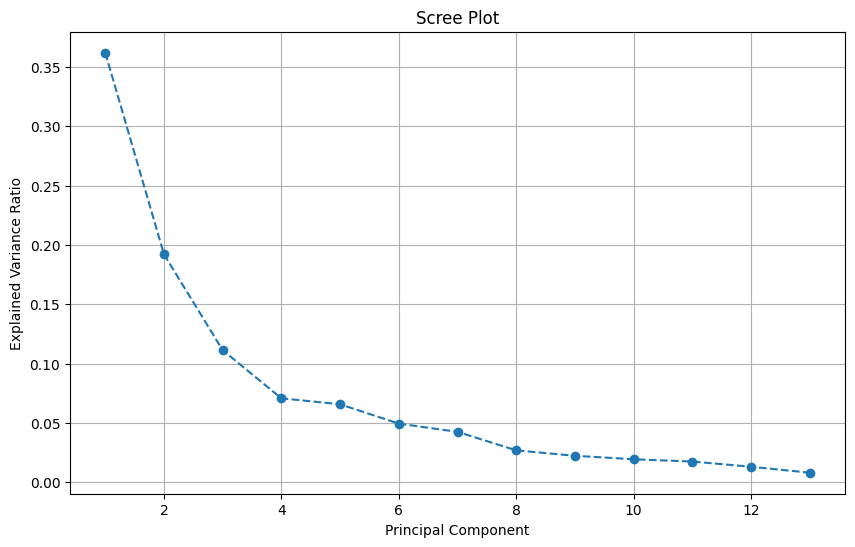

In [13]:
# SCREE PLOT (Eigenvalues)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

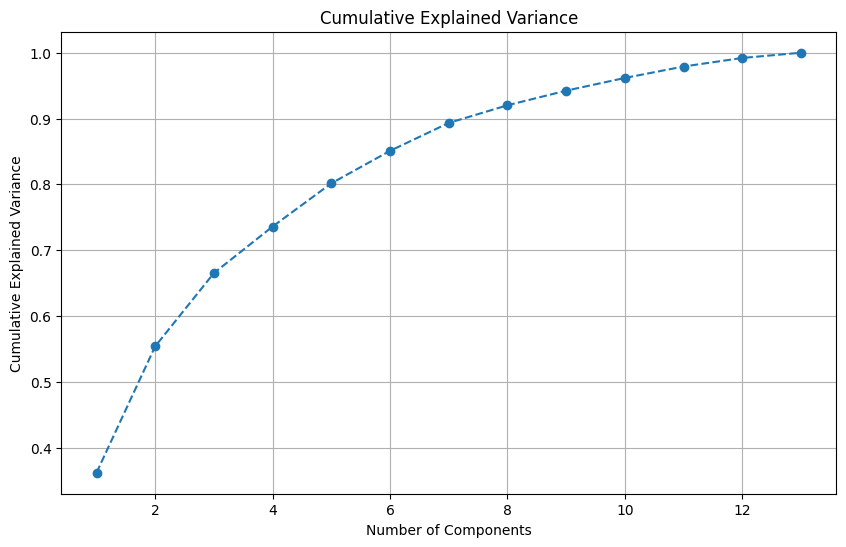

In [14]:
# CUMULATIVE EXPLAINED VARIANCE

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [15]:
# DETERMINE OPTIMAL NUMBER OF COMPONENTS

explained_var = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Variance Explained:")
print(explained_var)

optimal_components = 3

pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X_scaled)

print("\nTransformed Shape (PCA):", X_pca_final.shape)




Cumulative Variance Explained:
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]

Transformed Shape (PCA): (178, 3)


In [16]:
# DISPLAY FINAL PCA RESULT (First 5 rows)

pca_df = pd.DataFrame(X_pca_final, 
                      columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["Type"] = y.values

print("\nPCA Transformed Data (First 5 rows):")
print(pca_df.head())


PCA Transformed Data (First 5 rows):
        PC1       PC2       PC3  Type
0  3.316751  1.443463 -0.165739     1
1  2.209465 -0.333393 -2.026457     1
2  2.516740  1.031151  0.982819     1
3  3.757066  2.756372 -0.176192     1
4  1.008908  0.869831  2.026688     1


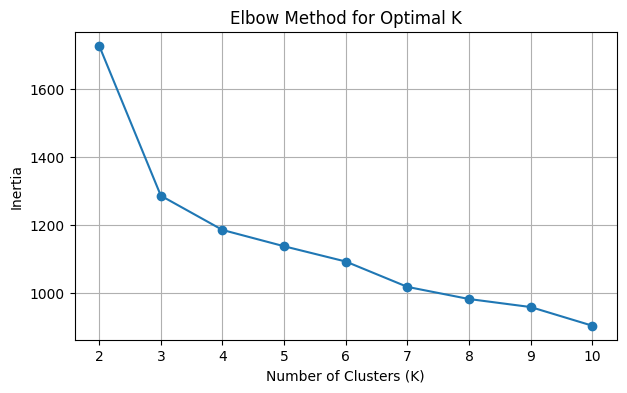

Cluster Labels Assigned!


In [20]:
# Task 3: Clustering with Original Data:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply K-Means Clustering


# Finding optimal K using elbow method
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df["Cluster"] = clusters

print("Cluster Labels Assigned!")

In [21]:
# Evlaution 
sil_score = silhouette_score(df_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.30648398324833453


In [22]:
db_index = davies_bouldin_score(df_scaled, clusters)
print("Davies–Bouldin Index:", db_index)


Davies–Bouldin Index: 1.315707552261773
